In [1]:
import sys
sys.path.append("/home/go/documents/code/flowpy/")
from IPython.display import clear_output
from JSAnimation.IPython_display import display_animation

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from flopy import solver
from flopy import animation

In [21]:
cells = 3
dimensions = 2
mesh=solver.Mesh(cells, dimensions=dimensions)

In [5]:
Γ = solver.uniScalarField(mesh, -1.0)
Temp = solver.uniScalarField(mesh, 0.0)
U = solver.uniScalarField(mesh, 1.0)
centre = (cells**dimensions)/2 + (cells**(dimensions/2))/2
Temp[centre]=5

In [9]:
def run(steps, mesh, Temp, Γ, outp):
    outp.append(Temp)
    for i in range(steps):
        Temp = solver.ddt(
            solver.laplace_(mesh, solver.cds, Temp, Γ) 
            - solver.grad_(mesh, solver.cds, U, Temp), 
            Temp, 0.01)
        outp.append(Temp)
    return outp

In [10]:
times=100
Temps=run(times, mesh, Temp, Γ, [])


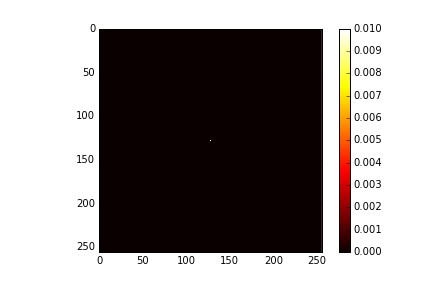
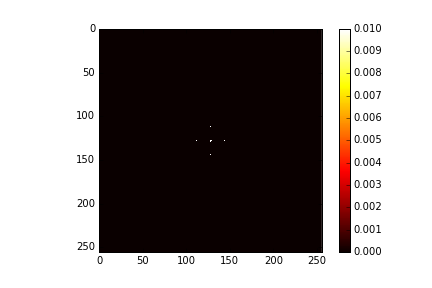
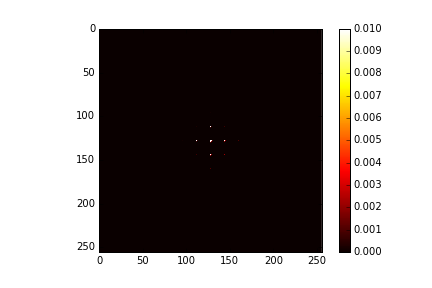
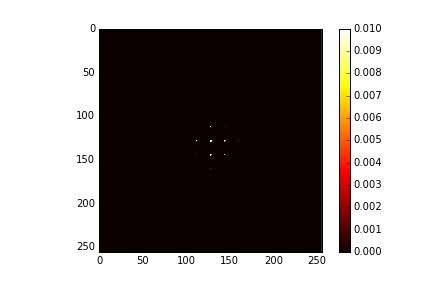
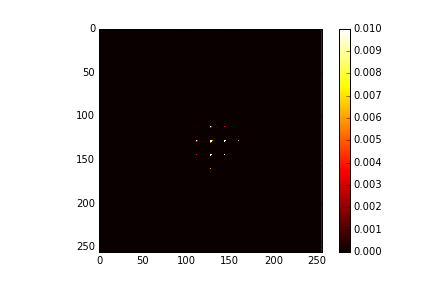
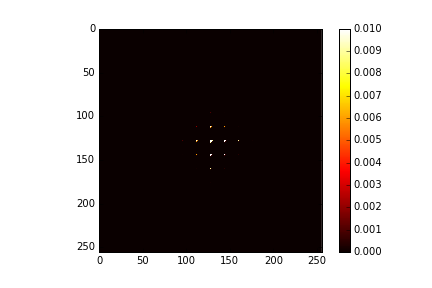
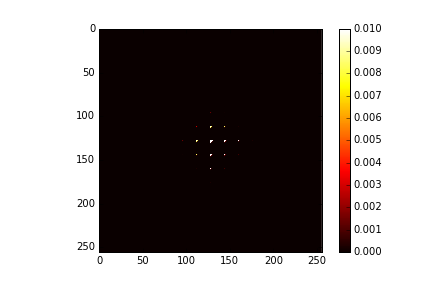
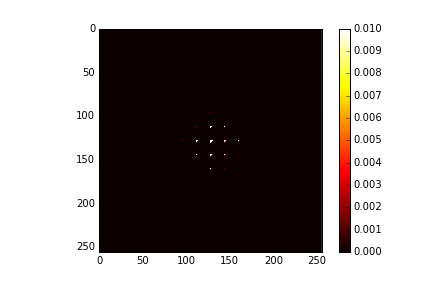
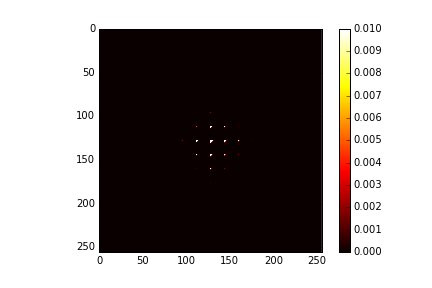
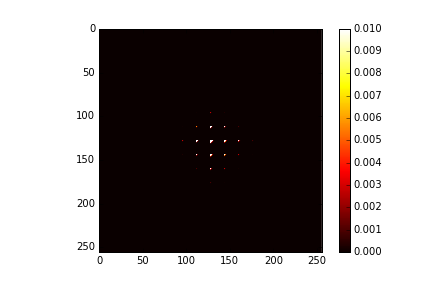
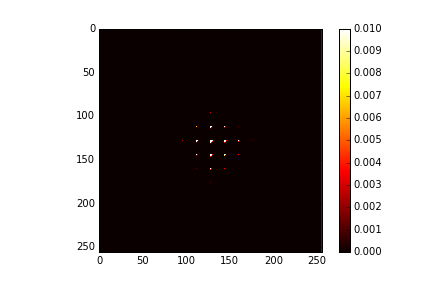
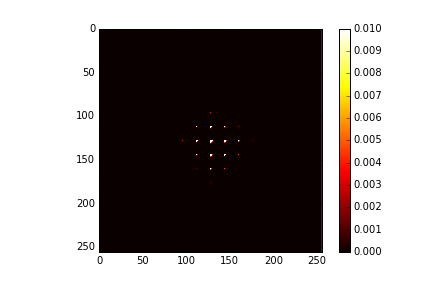
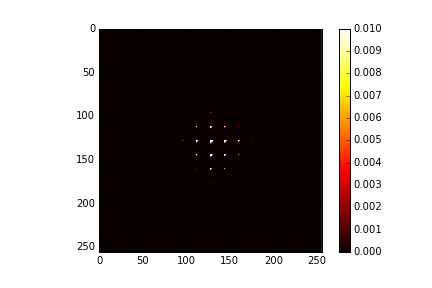
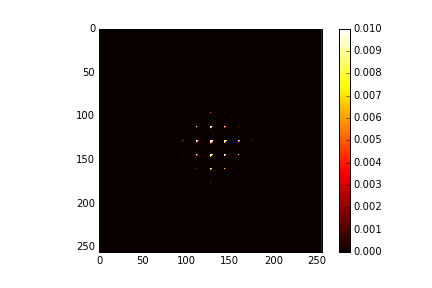
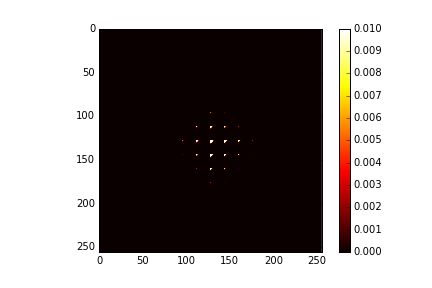
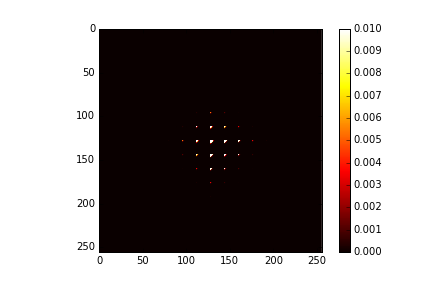
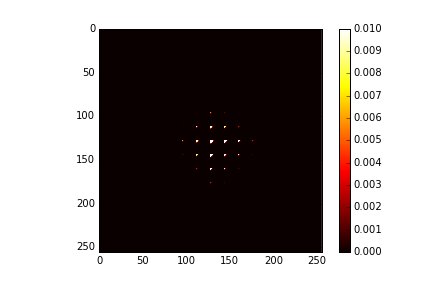
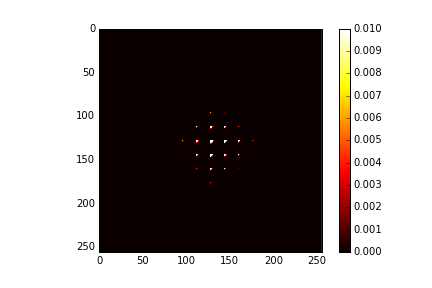
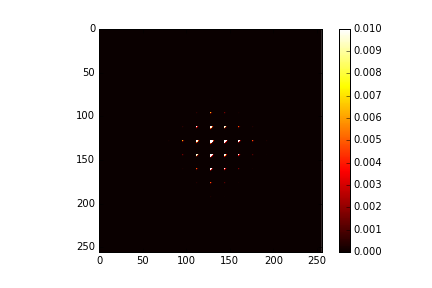
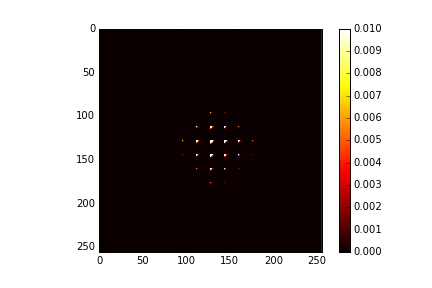
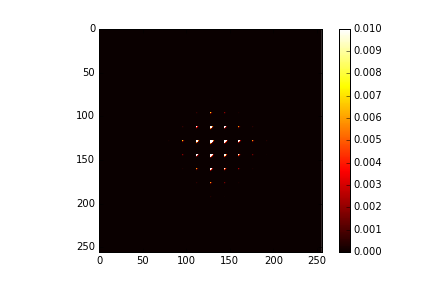
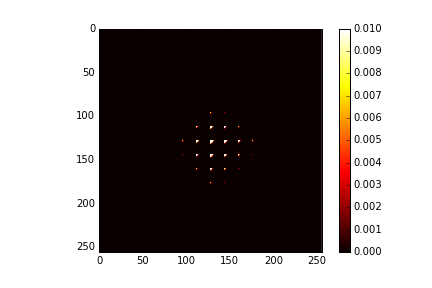
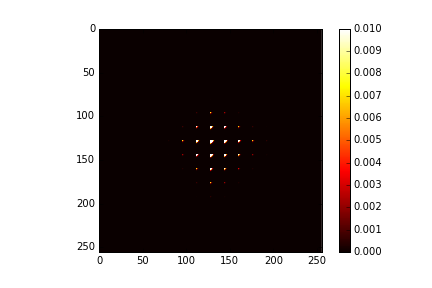
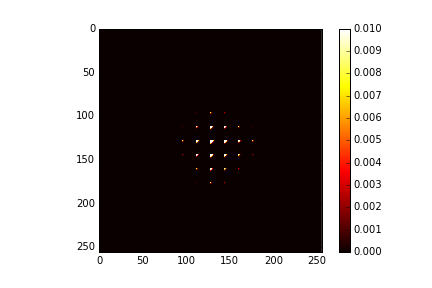
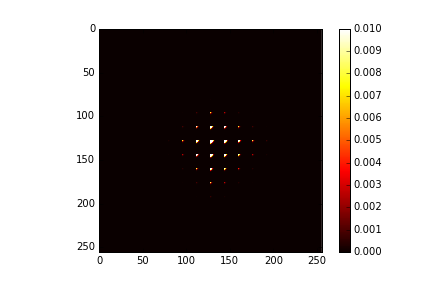
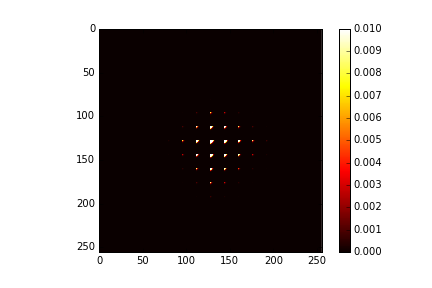
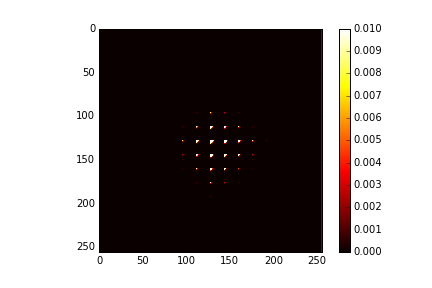
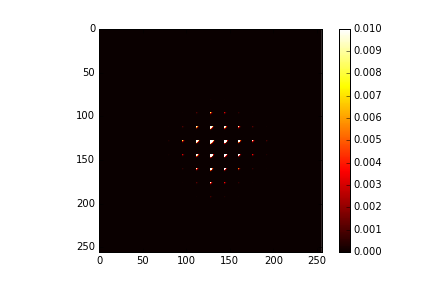
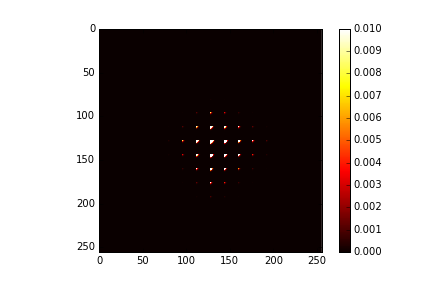
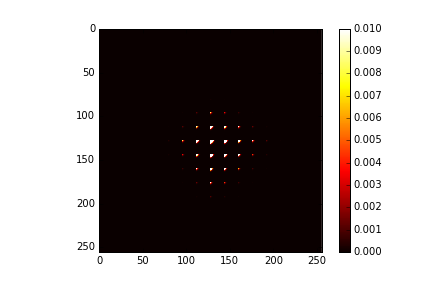
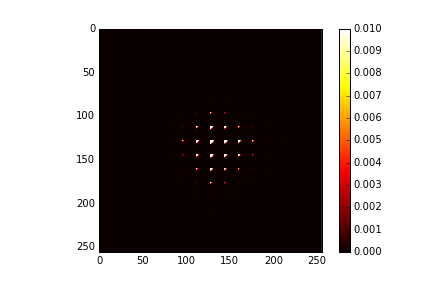
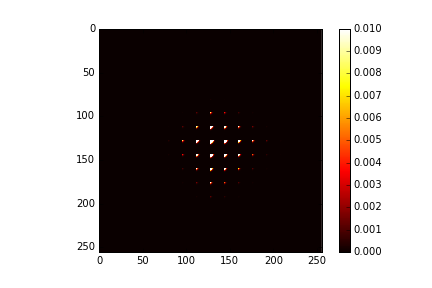
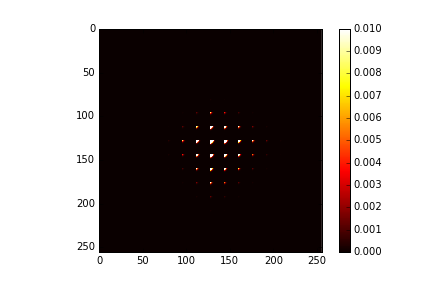
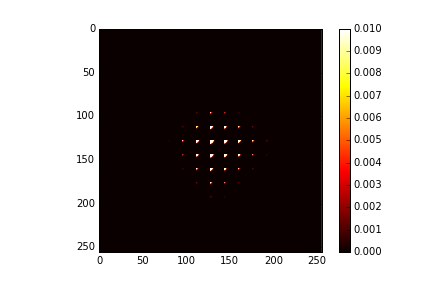
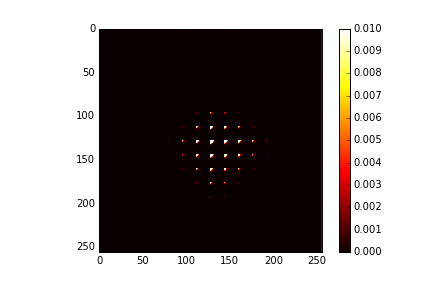
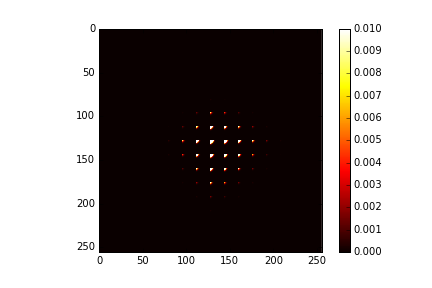
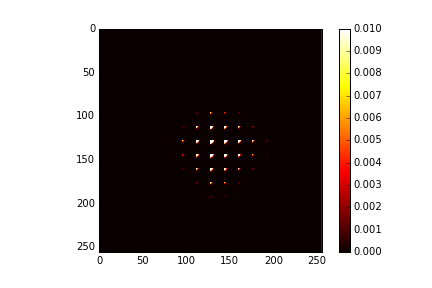
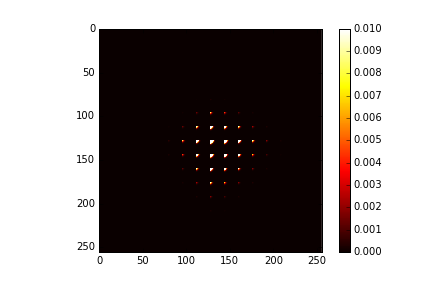
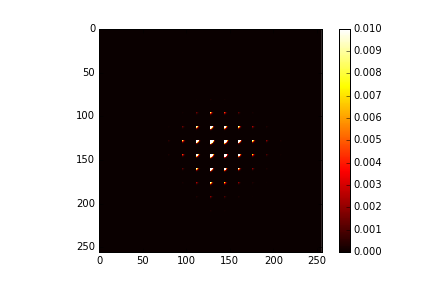
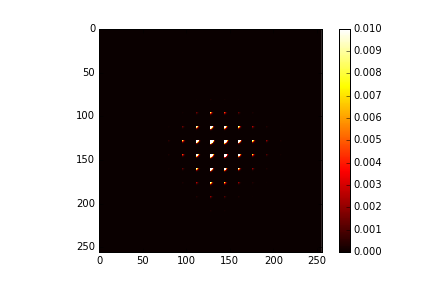
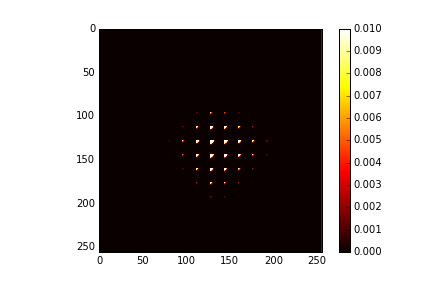
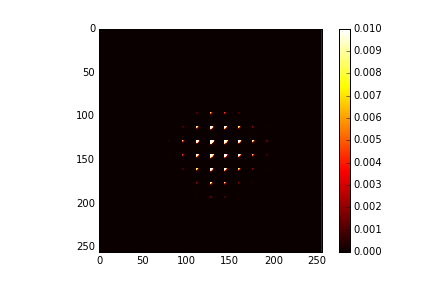
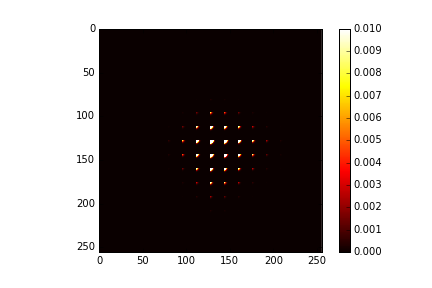
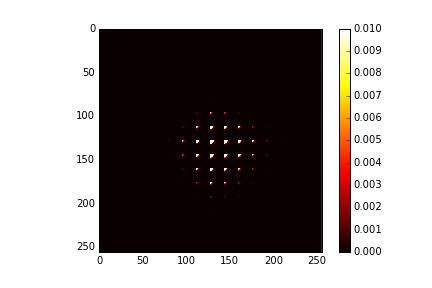
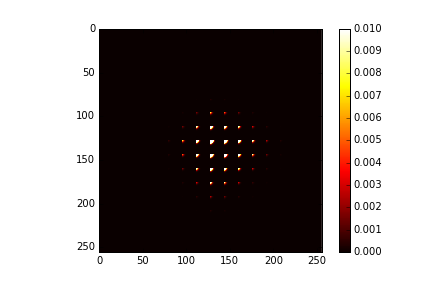
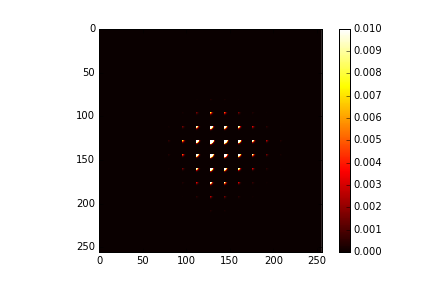
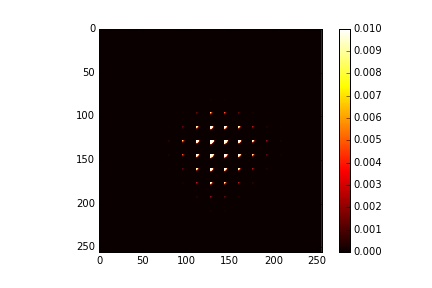
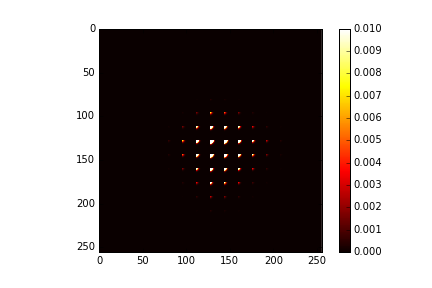
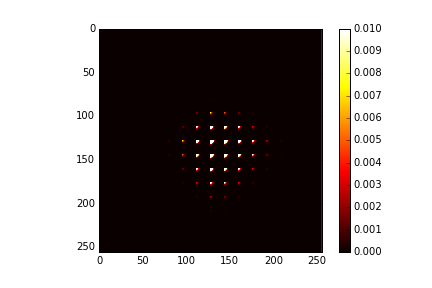
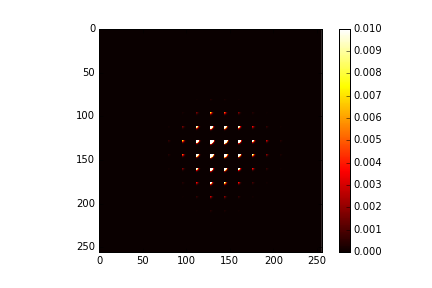
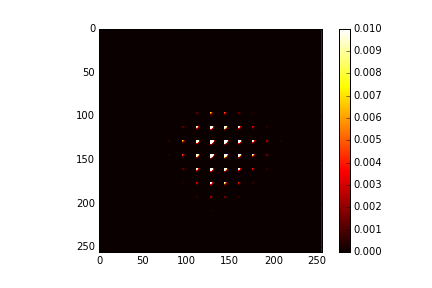
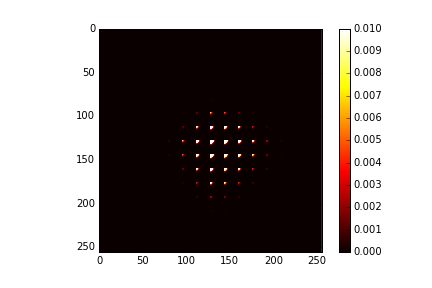
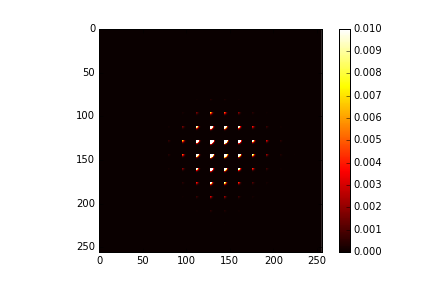
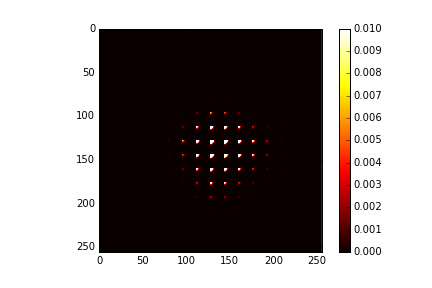
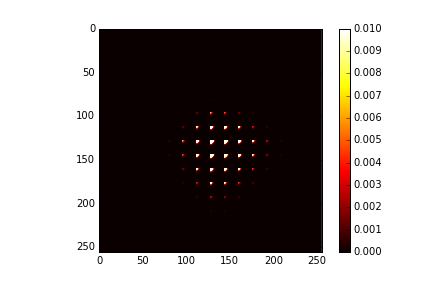
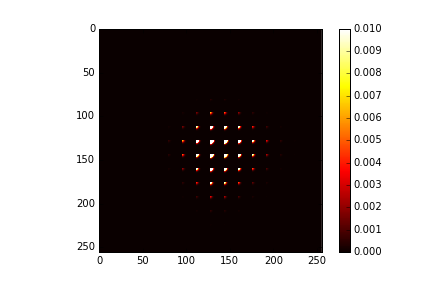
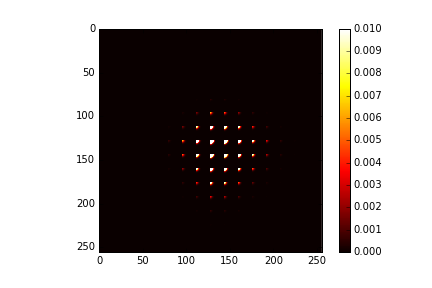
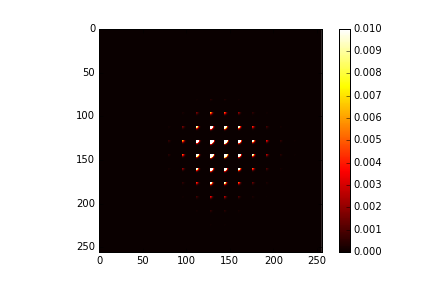
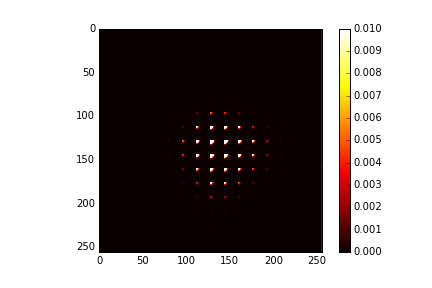
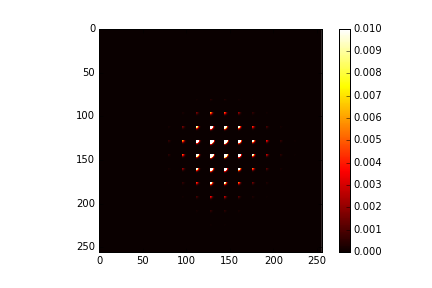
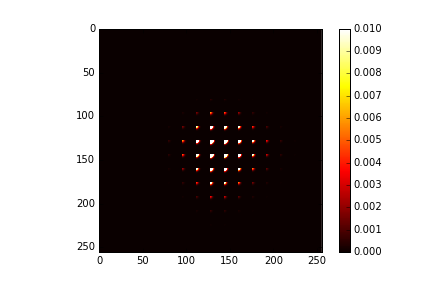
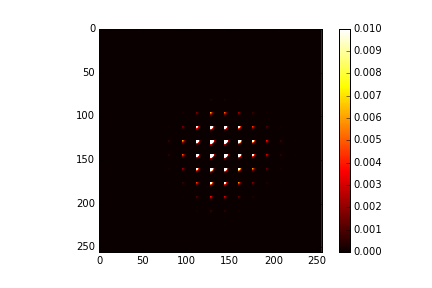
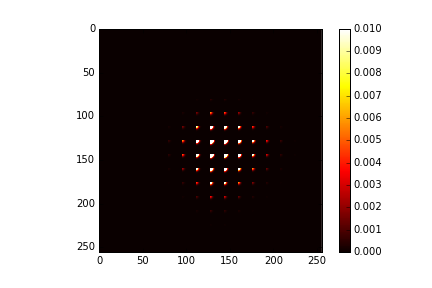
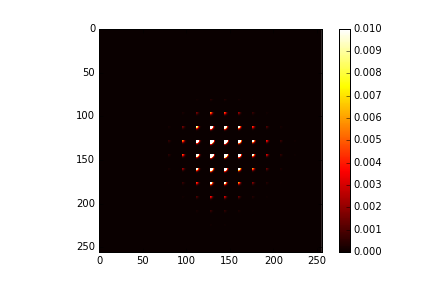
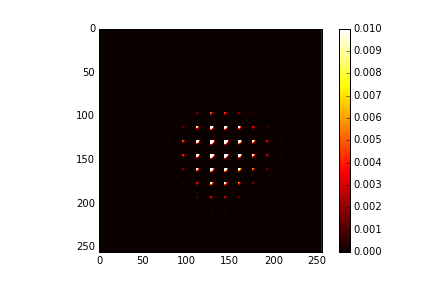
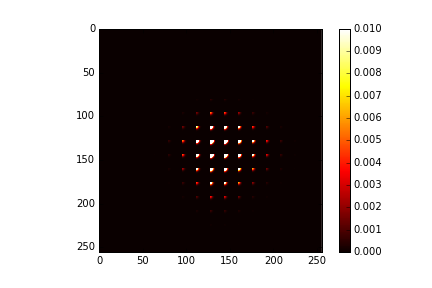
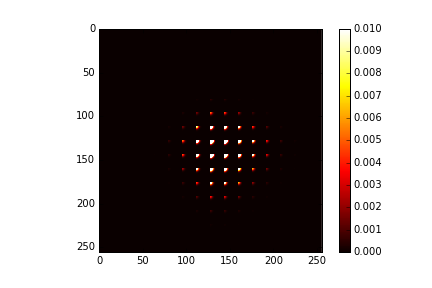
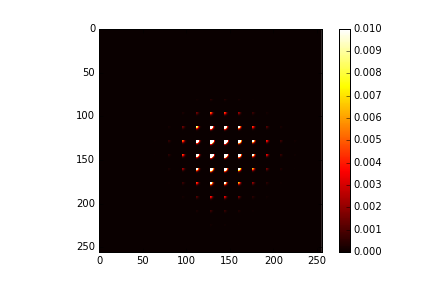
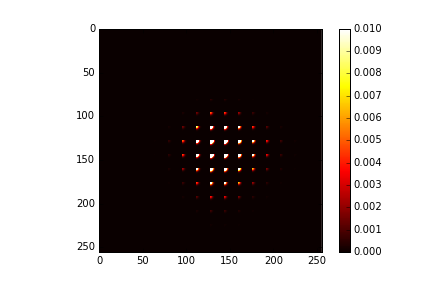
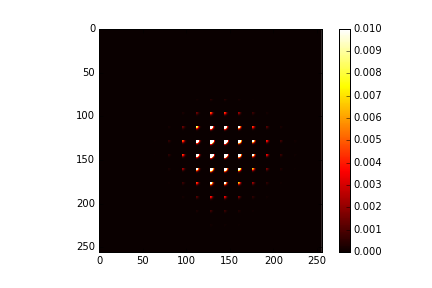
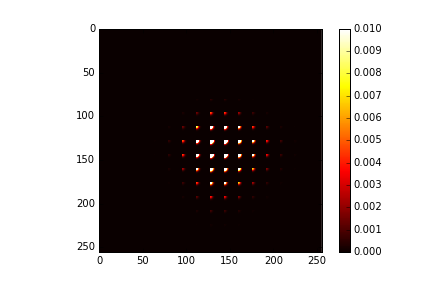
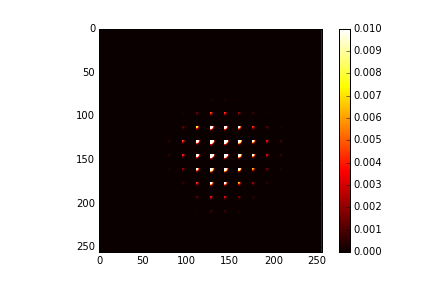
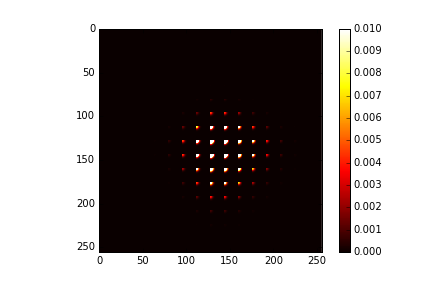
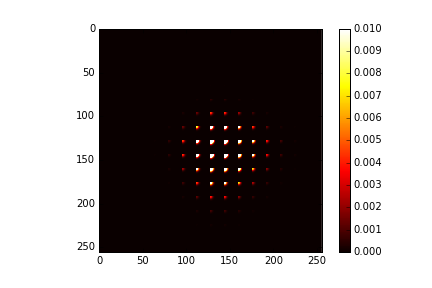
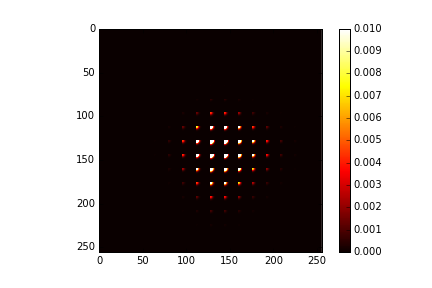
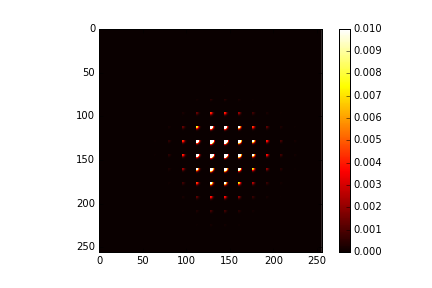
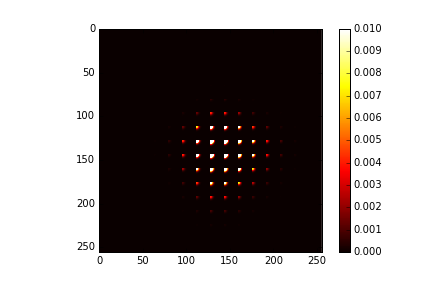
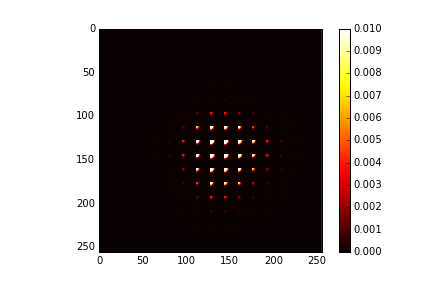
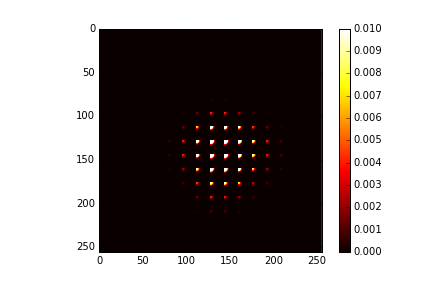
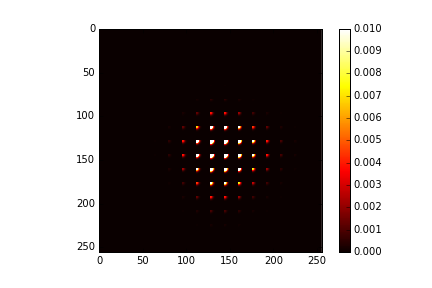
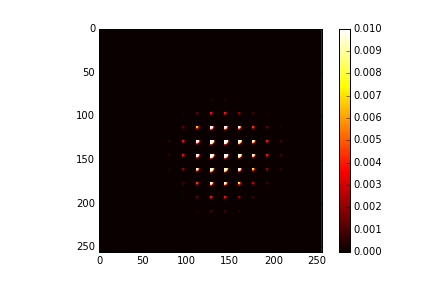
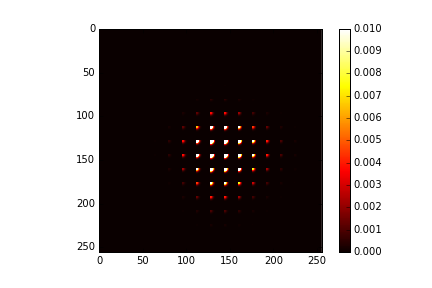
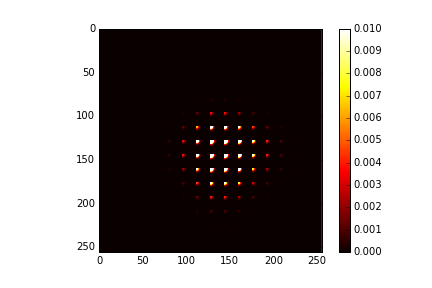
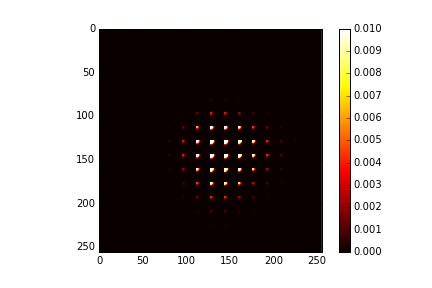
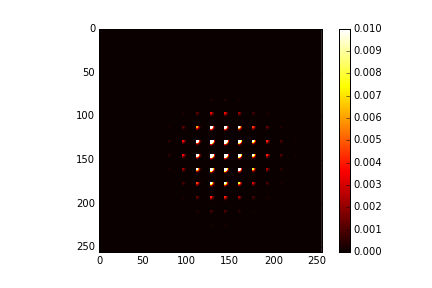
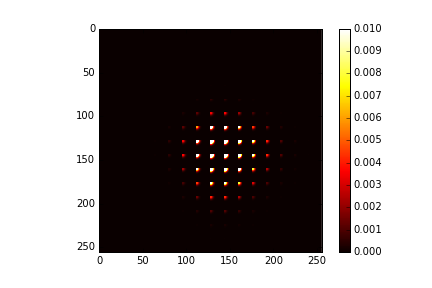
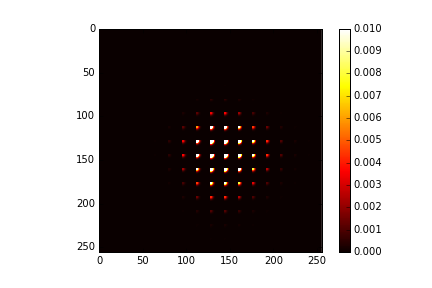
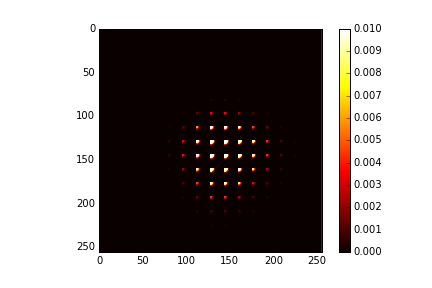
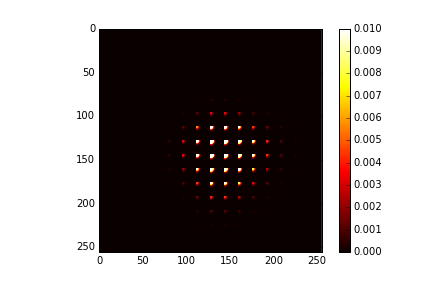
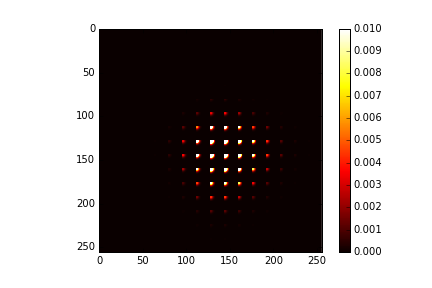
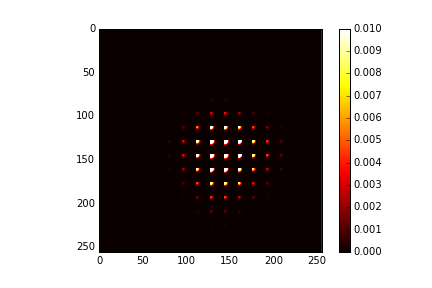
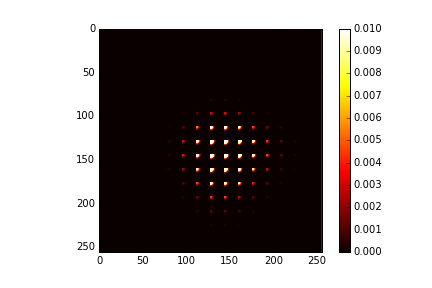
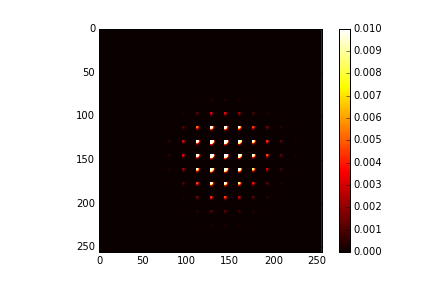
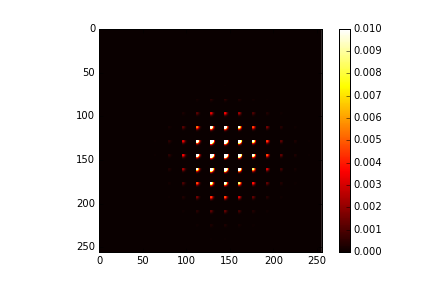
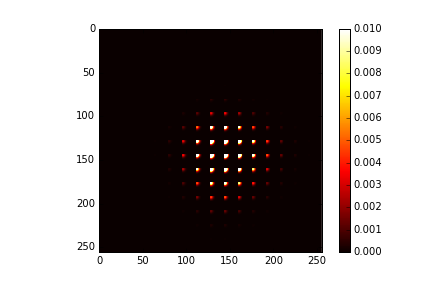
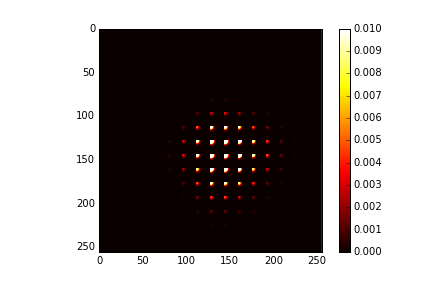
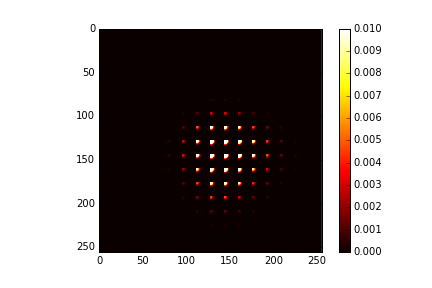
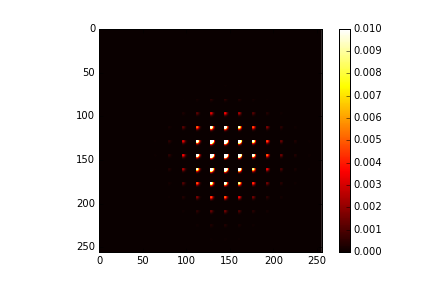
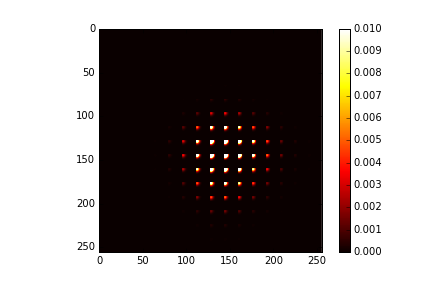
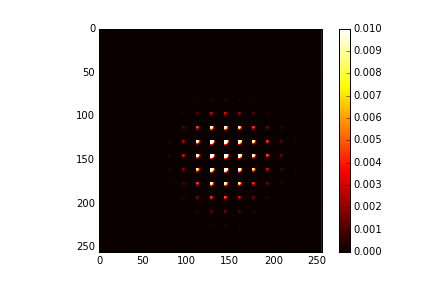

In [11]:
display_animation(animation.create_animation(Temps, mesh, dimensions, times))

In [10]:
%timeit solver.uniScalarField(mesh, 0.0)

1000 loops, best of 3: 436 µs per loop


In [16]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an
        object whose __array__ method returns an array, or any
        (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then
        the type will be determined as the minimum type required
        to hold the objects in the sequence.  This argument can only
        be used to 'upcast' the array.  For downcasting, use the
        .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy
        will only be made if __array__ returns a copy, if obj is a
        nested sequence, or if a copy is needed to satisfy any of the other
        requirements (`dtype`, `order`, etc.).

In [25]:
mesh.neighbour_mask[1].toarray()

array([[-1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])